IMDB 데이터셋으로 LSTM 학습시키기


In [1]:
from tensorflow.keras.datasets import imdb

num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 350

pad_X_train = pad_sequences(X_train, maxlen=max_len)
pad_X_test = pad_sequences(X_test, maxlen=max_len)

print(len(pad_X_train[0]))

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

model = Sequential()
model.add(Embedding(input_dim = num_words, output_dim = 32))
model.add(LSTM(64, return_sequences = True))
model.add(LSTM(64, return_sequences = True))
model.add(LSTM(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = ['acc'])


17464789/17464789 [==============================] - 1s 0us/step
(25000,) (25000,)
(25000,) (25000,)
350


모델 학습 시키기


In [2]:

history =model.fit(pad_X_train, y_train,
	batch_size =32, epochs=15,
	validation_split=0.2)


Epoch 1/15
625/625 [==============================] - 100s 143ms/step - loss: 0.6581 - acc: 0.5576 - val_loss: 0.6934 - val_acc: 0.4938
Epoch 2/15
625/625 [==============================] - 41s 66ms/step - loss: 0.6614 - acc: 0.5638 - val_loss: 0.6253 - val_acc: 0.6472
Epoch 3/15
625/625 [==============================] - 35s 55ms/step - loss: 0.6703 - acc: 0.5563 - val_loss: 0.6755 - val_acc: 0.6524
Epoch 4/15
625/625 [==============================] - 29s 46ms/step - loss: 0.5447 - acc: 0.7149 - val_loss: 0.4492 - val_acc: 0.7976
Epoch 5/15
625/625 [==============================] - 27s 43ms/step - loss: 0.3850 - acc: 0.8316 - val_loss: 0.4566 - val_acc: 0.8108
Epoch 6/15
625/625 [==============================] - 29s 46ms/step - loss: 0.2938 - acc: 0.8870 - val_loss: 0.3605 - val_acc: 0.8506
Epoch 7/15
625/625 [==============================] - 25s 40ms/step - loss: 0.2393 - acc: 0.9093 - val_loss: 0.3764 - val_acc: 0.8538
Epoch 8/15
625/625 [==============================] - 23s 37

학습과정 그리기

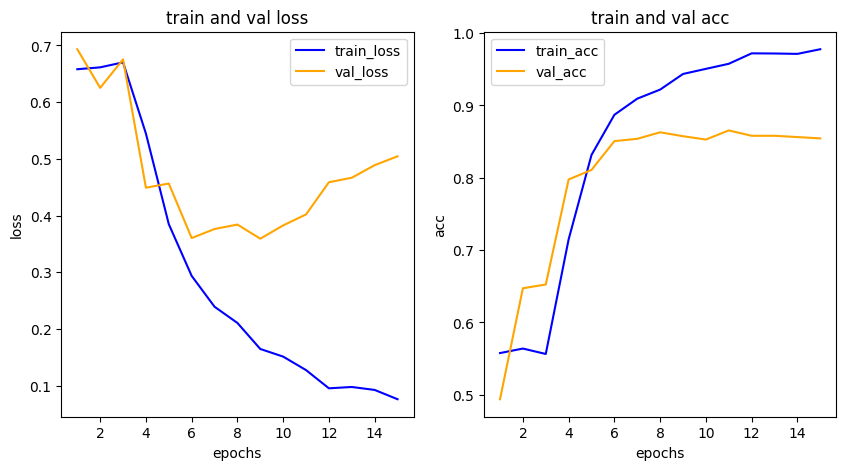

In [3]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()


reuters 데이터셋 다뤄보기


In [4]:
from tensorflow.keras.datasets import reuters

num_words = 10000
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=num_words)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 500

pad_X_train = pad_sequences(X_train, maxlen=max_len)
pad_X_test = pad_sequences(X_test, maxlen=max_len)

print(len(pad_X_train[0]))


2110848/2110848 [==============================] - 1s 0us/step
(8982,) (8982,)
(2246,) (2246,)
500


LSTM 층을 사용하여 모델 구성하기


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

model = Sequential()
model.add(Embedding(input_dim = num_words, output_dim = 64))
model.add(LSTM(64, return_sequences = True))
model.add(LSTM(32))
model.add(Dense(46, activation = 'softmax'))

model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['acc'])


모델 학습하기


In [6]:
history = model.fit(pad_X_train, y_train,
                    batch_size = 32, epochs = 20,
                    validation_split = 0.2)


Epoch 1/20
225/225 [==============================] - 57s 237ms/step - loss: 2.5412 - acc: 0.3523 - val_loss: 2.4070 - val_acc: 0.3450
Epoch 2/20
225/225 [==============================] - 39s 175ms/step - loss: 2.4087 - acc: 0.3534 - val_loss: 2.4059 - val_acc: 0.3450
Epoch 3/20
225/225 [==============================] - 29s 130ms/step - loss: 2.4085 - acc: 0.3534 - val_loss: 2.3903 - val_acc: 0.3450
Epoch 4/20
225/225 [==============================] - 23s 101ms/step - loss: 2.0664 - acc: 0.4711 - val_loss: 1.8362 - val_acc: 0.5164
Epoch 5/20
225/225 [==============================] - 18s 80ms/step - loss: 1.7742 - acc: 0.5407 - val_loss: 1.7619 - val_acc: 0.5387
Epoch 6/20
225/225 [==============================] - 16s 71ms/step - loss: 1.6512 - acc: 0.5652 - val_loss: 1.7080 - val_acc: 0.5409
Epoch 7/20
225/225 [==============================] - 12s 52ms/step - loss: 1.5435 - acc: 0.5873 - val_loss: 1.7366 - val_acc: 0.5337
Epoch 8/20
225/225 [==============================] - 13s 

학습과정 그리기


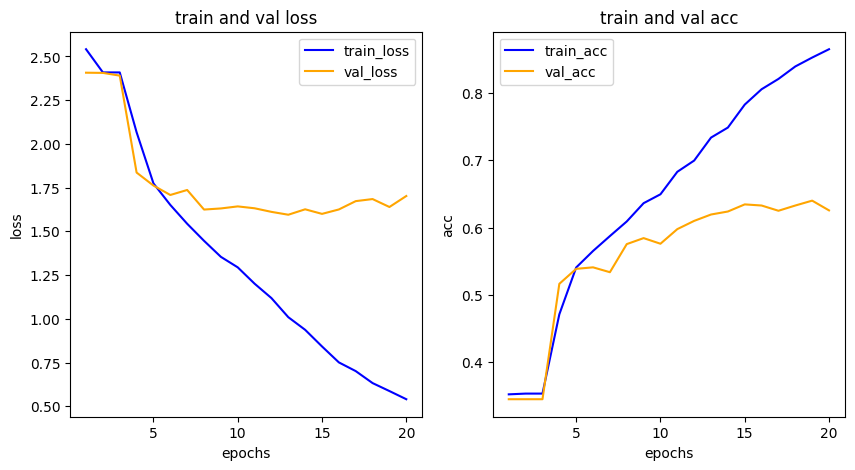

In [7]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()
